In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from MyLogisticRegression import  LogisticRegression

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:, 0]**2+X[:, 1]**2)<1.5, dtype=np.int32)

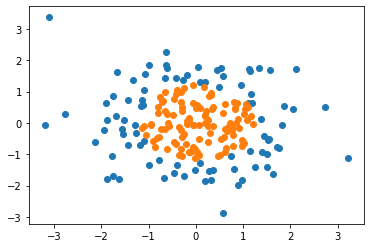

In [32]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

0.6816499939842642

In [34]:
log_reg.score(X, y) # 分类准确度较低

0.605

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


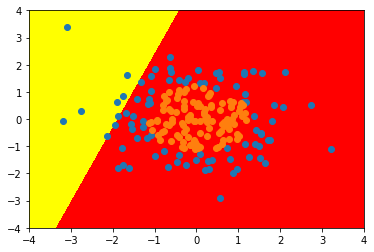

In [35]:
def plot_decision_boundary(model, 
                           axis): # 坐标轴范围
    """绘制决策边界""" 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'red'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [36]:
def PolynomialLogisticRegression(degree):
    # 管道机制实现了对全部步骤的流式化封装和管理
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression()) # 手工实现的LogisticRregression类
    ])

In [37]:
poly_log_reg = PolynomialLogisticRegression(degree=2) # 最高项次数为2
poly_log_reg.fit(X, y) # 使用的是第三项("lin_reg", LogisticRegression())的fit方法

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 <MyLogisticRegression.LogisticRegression object at 0x0000024142253948>)],
         verbose=False)

In [38]:
# 拟合效果较好
poly_log_reg.score(X, y) # 使用的是第三项("lin_reg", LogisticRegression())的score方法

1.0

D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


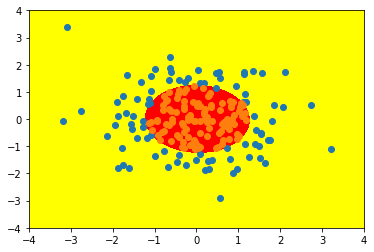

In [39]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [82]:
poly_log_reg2 = PolynomialLogisticRegression(degree=9) # 最高项次数为10
poly_log_reg2.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=9, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 <MyLogisticRegression.LogisticRegression object at 0x000002414531A748>)],
         verbose=False)

D:\PythonCode\H_Model\逻辑斯蒂回归与最大熵模型\手工代码实现\MyLogisticRegression.py:58: RuntimeWarning: invalid value encountered in greater_equal
  return np.array(proba >= 0.5, dtype='int')  # 概率大于0.5则为1,否则为0
D:\CodeProgram\anconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


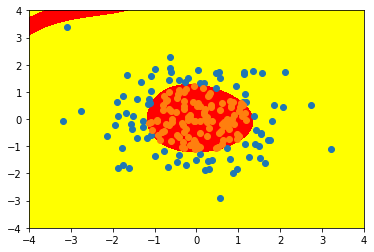

In [83]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4]) # 决策边界复杂,可能出现了过拟合
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()